# Computer Vision - Laboratory

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [2]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [2]:
%matplotlib inline

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

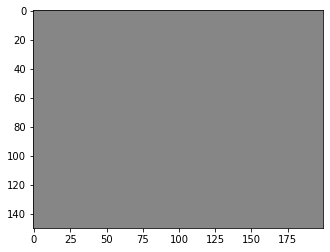

In [55]:
#Your solution
image = np.zeros((150, 200,3), dtype=np.uint8)  #creating a bidimensional array of type uint8
#image[0,0:200,:150,]=[128,128,128] #this in case we had a RBG
#restamos el valor a imagen para que de el color gris
image = image -122 #enrealidad esto no hace falta, lo importante es lo de abajo
plt.imshow(image, cmap = 'gray')#esto es lo que hace que la imagen sea de tipo grayscale

How many values can each pixel have in this case? 

In [12]:
#Your solution
un valor de 0 a 255 porque es 2^8

b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). 

Visualize the image and print the values of its first row.

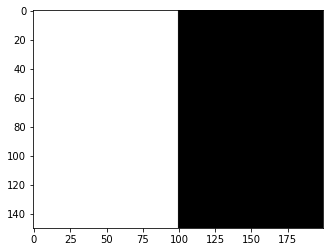

In [20]:
#Your solution
#se puede de 2 formas
#sin usar RGB, y usamos cmap='gray' 
array=np.zeros((150,200), dtype=np.uint8) #sin especificar el ,3 para RGB tomara el color por defecto 
array[:,0:100]=[1] #ponemos los pixeles de 0 a 100 de un color diferente
plt.imshow(array, cmap='gray') # sin el cmap= ´gray´ veriamos los colores por defecto (morado y amarrilo)


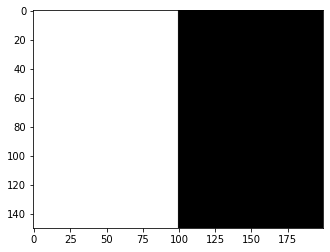

In [37]:
#Your solution
array=np.zeros((150,200,3), dtype=np.uint8) #usando RGB
array[:,0:100]=[255] #ponemos los pixeles de 0 a 100 blancos
plt.imshow(array) #imprimimos

### 1.2 Image saving and loading

a) Use the IO image package to save the image previously created:

In [38]:
#Your solution
io.imsave('arr.jpeg',array) #sino especificamos, lo guarda en Laboratory 1 Image processing with skimage-20210919

b) Load the saved image and visualize it:

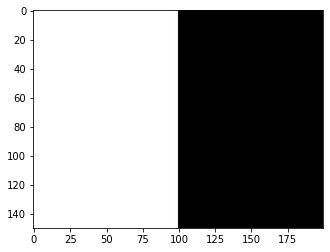

In [39]:
#Your solution
img = io.imread('arr.jpeg') #leemos el archivo cuyo nombre establecimos como arr.jpeg mas arriba

plt.imshow(img, cmap='gray') #Visualizing a figure with the image
plt.show() 

### 1.3 Images manipulation and image masks

a) Load and show the image lenna.jpg, and check its dimensions. Add a black frame to Lenna's image. It should have a width of 1/10th of the height of the original image. We recommend to create a bigger black image to later embed the original image in the central part.

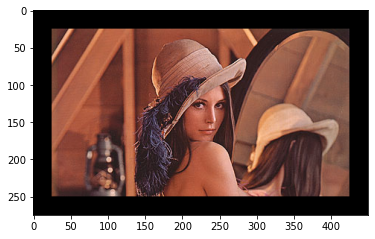

In [73]:
#Your solution
img = io.imread('images/lenna.jpg')
frame = np.zeros((275,450,3), dtype=np.uint8)
combination1 = frame.copy()

# replace values at coordinates (100, 100) to (399, 399) of img3 with region of img2
combination1[25:250,25:425] = img
plt.imshow(combination1, cmap='gray')

b) Change the mask of the framed image to red. Visualize the three images with their respective titles.

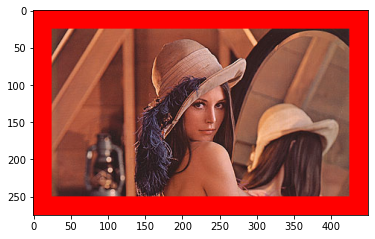

In [71]:
#Your solution
img = io.imread('images/lenna.jpg')
frame = np.zeros((275,450,3), dtype=np.uint8)
frame[0:275, 0:450] = [255, 0, 0]
combination2 = frame.copy()

# replace values at coordinates (100, 100) to (399, 399) of img3 with region of img2
combination2[25:250,25:425] = img
#combination[0:25,0:400] = [255, 0, 0]

plt.imshow(combination2, cmap='gray')

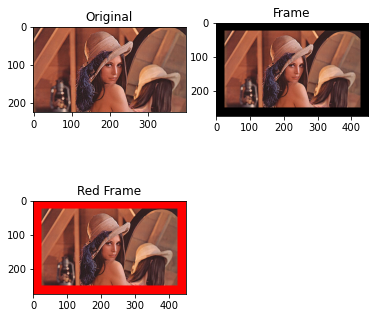

In [69]:
fig = plt.figure(figsize=(6,6))

fig.add_subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original')

fig.add_subplot(2, 2, 2)
plt.imshow(combination1)
plt.title('Frame')

fig.add_subplot(2, 2, 3)
plt.imshow(combination2)
plt.title('Red Frame')

plt.show()

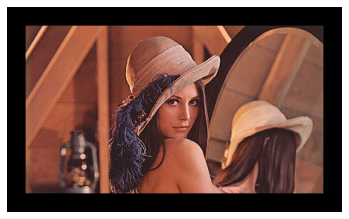

In [61]:
fig, ax = plt.subplots()
ax.imshow(combination1)
ax.axis('off')  # clear x- and y-axes
plt.show()


### 1.4 Color manipulation

a) Create and visualize the three images shown in the following figure:
<img src="./images_notebook/ex17a.png">

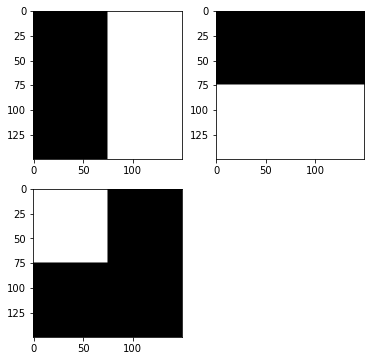

In [6]:
#Your solution
sq1=np.zeros((150,150,3), dtype=np.uint8) #usando RGB
sq1[0:150,0:150]=[255] #ponemos todo blanco
sq1[:,0:75]=[0] #ponemos los pixeles de 0 a 100 negros

sq2=np.zeros((150,150,3), dtype=np.uint8) #usando RGB
sq2[75:150,:]=[255] #ponemos los pixeles de 0 a 100 blancos

sq3=np.zeros((150,150,3), dtype=np.uint8) #usando RGB
sq3[0:75,0:75]=[255] #ponemos los pixeles de 0 a 100 blancos

#para mostrarlo todo de una
fig = plt.figure(figsize=(6,6))

fig.add_subplot(2, 2, 1)
plt.imshow(sq1) #imprimimos

fig.add_subplot(2, 2, 2)
plt.imshow(sq2) #imprimimos

fig.add_subplot(2, 2, 3)
plt.imshow(sq3) #imprimimos

b) Using these three images, construct the following color image:
<img src='./images_notebook/ex17b.png'>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


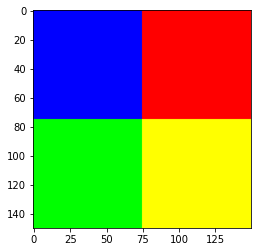

In [39]:
sqFinal = (sq1 * [255,0,0]) + (sq3 * [0,0,255]) + (sq2 * [0,255,0])
plt.imshow(sqFinal)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


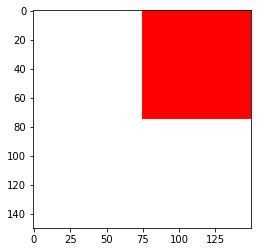

In [15]:
#ejemplo: si hacemos asi, podemos poner solo el cuadro de arriba a la derecha en rojo, pero al sumar, siempre predomina
#el color blanco, por eso es mejor multiplicar (para "deshacernos" del blanco) y luego combinar los cuadros con la suma
sq4 = (sq3 + [255,0,0]) + sq2
plt.imshow(sq4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


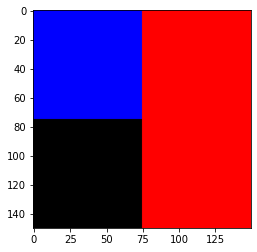

In [34]:
#ejemplo: fijense que aqui, al multiplicar primero por los colores que queremos cambiar, y sumar luego, eliminamos el blanco
sq5 = (sq1 * [255,0,0]) + (sq3 * [0,0,255]) 
plt.imshow(sq5)

c) Read and visualize the image `sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/ex17c.png">

<img src="images_notebook/ex17c2.png">

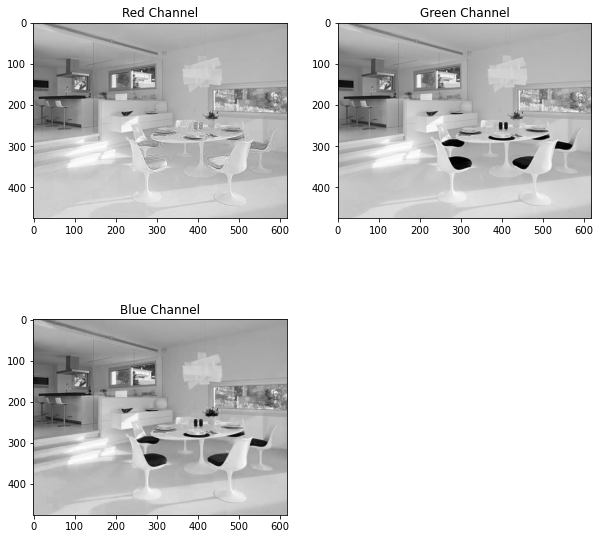

In [12]:
#Your solution
chair = io.imread('images/sillas.jpg')

#como chair tiene su componente RBG, por ser un arreglo 3, el tercer componente es el de RGB. 
#si le asignamos a cada uno su respectivo canal RBG...
red_channel = chair[:,:,0] #0 siendo el rojo (porque es el indice 0 de la lista de 3 RGB)
green_channel = chair[:,:,1]#1 es el verde
blue_channel = chair[:,:,2] #y 2 es el azul

#imprimimos todo
fig = plt.figure(figsize=(10,10))

fig.add_subplot(2, 2, 1)
plt.imshow(red_channel, cmap='gray')#importante usar el gray scale
plt.title('Red Channel')

fig.add_subplot(2, 2, 2)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')

fig.add_subplot(2, 2, 3)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')

plt.show()

### 1.5 Color image conversion

a) Load and show the image `lenna.jpg`, and check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation.

(225, 400, 3)
270000


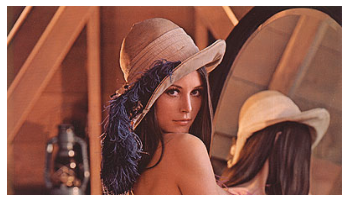

In [97]:
#Your solution
from skimage import io
lenna = io.imread('images/lenna.jpg')
print(lenna.shape)
print(lenna.size)
plt.imshow(lenna)
plt.axis('off')
plt.show()

b) Convert the previous image to grayscale, visualize and save it. Moreover, show both images (RGB & greyscale) details such as shape, dtype, max and min values.

lenna_gray:
shape:  (225, 400)  dtype:  float64  max values:  0.9869937254901961  min values:  0.0014137254901960784
lenna_original:
shape:  (225, 400, 3)  dtype:  uint8  max values:  255  min values:  0


(-0.5, 399.5, 224.5, -0.5)

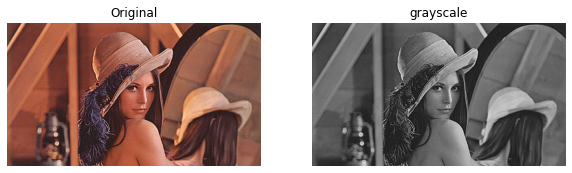

In [113]:
#Your solution
from skimage.color import rgb2gray
lenna_gray = rgb2gray(lenna)
plt.imsave('lenna_gray.jpeg',lenna_gray, cmap='gray')

print("lenna_gray:")
print ("shape: ", lenna_gray.shape, " dtype: ", lenna_gray.dtype, " max values: ",
       lenna_gray.max(), " min values: ", lenna_gray.min())

print("lenna_original:")
print ("shape: ", lenna.shape, " dtype: ", lenna.dtype, " max values: ",
       lenna.max(), " min values: ", lenna.min())

#para imprimir
fig = plt.figure(figsize=(10,10))

fig.add_subplot(2, 2, 1)
plt.imshow(lenna, cmap='gray')
plt.title('Original')
plt.axis('off')

fig.add_subplot(2, 2, 2)
plt.imshow(lenna_gray, cmap='gray')
plt.title('grayscale')
plt.axis('off')

c) Convert the lena image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row.

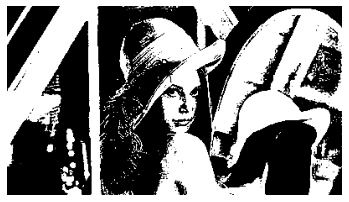

10th row: 
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255

In [121]:
#Your solution
from skimage import img_as_ubyte
imgb = img_as_ubyte(lenna_gray)

binar = imgb < 100
imgb[binar] = 0
binar2 = imgb > 100
imgb[binar2] = 255

plt.imshow(imgb, cmap ='gray')
plt.axis('off')
plt.show()

print("10th row: ")
print(imgb[9])


d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Set the corresponding titles of the images.

(-0.5, 399.5, 224.5, -0.5)

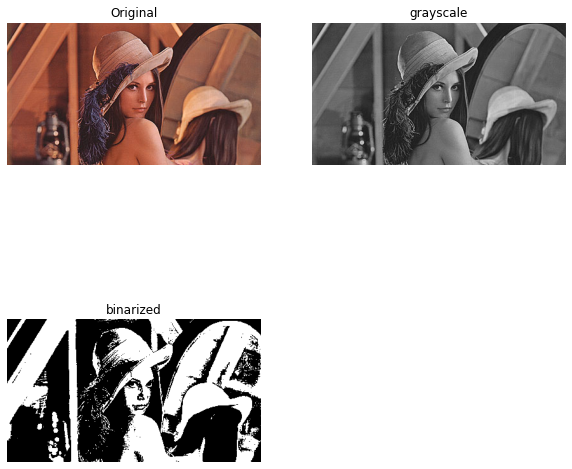

In [122]:
#Your solution
#para imprimir
fig = plt.figure(figsize=(10,10))

fig.add_subplot(2, 2, 1)
plt.imshow(lenna, cmap='gray')
plt.title('Original')
plt.axis('off')

fig.add_subplot(2, 2, 2)
plt.imshow(lenna_gray, cmap='gray')
plt.title('grayscale')
plt.axis('off')

fig.add_subplot(2, 2, 3)
plt.imshow(imgb, cmap='gray')
plt.title('binarized')
plt.axis('off')

### 1.6 Contrast enhancement

a) Open the image `car_lowContrast.jpg` and visualize it without graylevel enhancement. To this purpose, check which are the minimal and maximal values and how to use the command imshow without contrast enhancement.

Note: When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default.

min value:  63
max value:  193


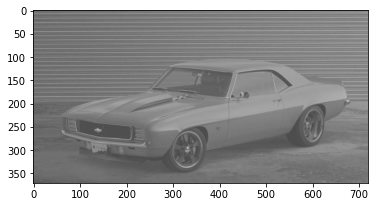

In [62]:
#Your solution
car_lowContrast = io.imread('images/car_lowContrast.jpg')
#quitar la mejora del grayscale no significa quitar el cmap = gray. Simplemente lo que hay que hacer es poner el valor 
#minimo = 0, y el maximo a 255, y ya con esto quitamos el enhancement del grayscale.
plt.imshow(car_lowContrast,cmap = 'gray', vmin=0, vmax=255)
print('min value: ', car_lowContrast.min())
print('max value: ', car_lowContrast.max())

b) Create an image called `dark_image` using the  values from the original one, so that the minimal value of the new image is 0. Check the minimal and maximal values of the new image, and compare them with the previous one.

min value:  0
max value:  130


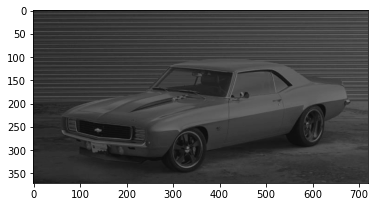

In [63]:
#Your solution
#importante usar np.copy para evitar problemas con cambiar la imagen original sin querer
dark_image = np.copy(car_lowContrast) #copiamos la imagen original aqui 
dark_image -= dark_image.min() #restamos el valor minimo a la imagen original (como estamos usando numpy, 
# directemente hace la resta sobre todos los vectores)
plt.imshow(dark_image,cmap = 'gray', vmin=0, vmax=255)
print('min value: ', dark_image.min())
print('max value: ', dark_image.max())

c) Create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and compare them with the previous one.

min value:  125
max value:  255


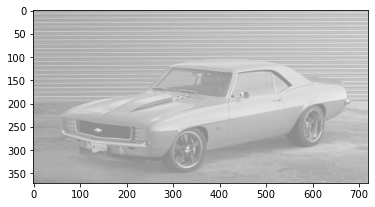

In [64]:
#Your solution
bright_im = np.copy(car_lowContrast) #copiamos la imagen original aqui 
bright_im += (255 - bright_im.max()) #sumamos el valor maximo de la imagen original
plt.imshow(bright_im,cmap = 'gray', vmin=0, vmax=255)
print('min value: ', bright_im.min())
print('max value: ', bright_im.max())

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command. Check the minimal and maximal values of the enhanced image, and compare them with the previous one. 

Implement the contrast enhancement using the two different available methods.

min value:  0.0
max value:  255.0


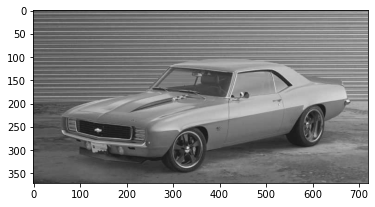

In [65]:
#Your solution
#by direc manipulation

contrast1 = np.copy(car_lowContrast) #copiamos la imagen original aqui 
#usando la formula de las transparencia para Contrast enhancement
contrast1 = ((contrast1 - contrast1.min()) / (contrast1.max() - contrast1.min())) * 255
plt.imshow(contrast1,cmap = 'gray')
print('min value: ', contrast1.min())
print('max value: ', contrast1.max())

min value:  0.0
max value:  1.0


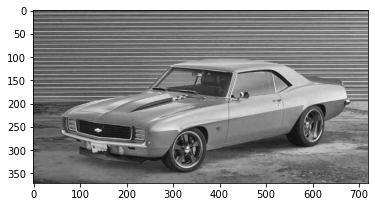

In [66]:
#by scikit-image command
from skimage import exposure

contrast2 =  exposure.equalize_adapthist(np.copy(car_lowContrast))
plt.imshow(contrast2,cmap = 'gray')
print('min value: ', contrast2.min())
print('max value: ', contrast2.max())

e) Visualize the 5 images in the same figure, each one with its corresponding title.

(-0.5, 719.5, 370.5, -0.5)

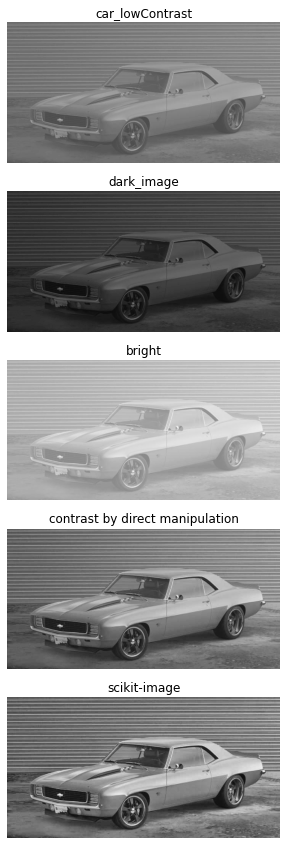

In [92]:
#Your solution
#para imprimir
fig = plt.figure(figsize=(15,15))

fig.add_subplot(5, 1, 1)
plt.imshow(car_lowContrast, cmap='gray', vmin=0, vmax=255)
plt.title('car_lowContrast')
plt.axis('off')

fig.add_subplot(5, 1, 2)
plt.imshow(dark_image, cmap='gray', vmin=0, vmax=255)
plt.title('dark_image')
plt.axis('off')

fig.add_subplot(5, 1, 3)
plt.imshow(bright_im, cmap='gray', vmin=0, vmax=255)
plt.title('bright')
plt.axis('off')

fig.add_subplot(5, 1, 4)
plt.imshow(contrast1, cmap='gray')
plt.title('contrast by direct manipulation')
plt.axis('off')

fig.add_subplot(5, 1, 5)
plt.imshow(contrast2, cmap='gray')
plt.title('scikit-image')
plt.axis('off')


### 1.7 Masks and logical image manipulation

a) Read the image `circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

[0 0 0]
[127 127 127]
[195 195 195]


(-0.5, 933.5, 776.5, -0.5)

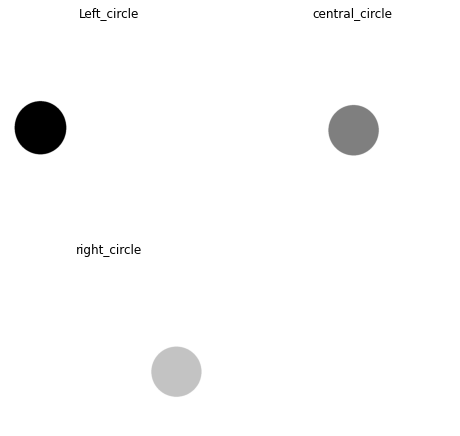

In [140]:
#Your solution
circles = io.imread('images/circles.bmp')

#vemos los valores RBG en estas posiciones para saber su color
print(circles[500][200])
print(circles[500][400])
print(circles[500][800])

#creamos las mascaras para cada caso
#es decir, tomamos los pixeles que no sean igual al valor RGB que descubrimos anteriormente, se los asignamos a una mascara
left_mask = circles != 0
central_mask = circles != 127
right_mask = circles != 195

#ahora con la mascara lo que hacemos es poner todo de color blanco
# Como la mascara es "todo lo que no es", ponemos todo los que no es de color 0 a blanco, y asi con los demas
left_circle = np.copy(circles)
left_circle[left_mask] = 255

central_circle = np.copy(circles)
central_circle[central_mask] = 255

right_circle = np.copy(circles)
right_circle[right_mask] = 255

#para imprimir
fig = plt.figure(figsize=(8,8))

fig.add_subplot(2, 2, 1)
plt.imshow(left_circle)
plt.title('Left_circle')
plt.axis('off')

fig.add_subplot(2, 2, 2)
plt.imshow(central_circle)
plt.title('central_circle')
plt.axis('off')

fig.add_subplot(2, 2, 3)
plt.imshow(right_circle)
plt.title('right_circle')
plt.axis('off')

b) Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.

In [35]:
#Your solution

coat = io.imread('images/coat.png')
model = io.imread('images/model.png')
texture1 = io.imread('images/OIP.jpg')
texture2 = io.imread('images/texture2.png')

#todo lo que no es un fondo negro, es la chaqueta
coat_mask = coat != 0

#Tenemos todo lo que no es negro (la chaqueta), ahora en la posicion del modelo (usando las coordendas de donde hay una
#chaqueta) ponemos las posiciones de la imagen coat, donde hay una chaqueta, en la imagen del modelo
model_wth_coat = np.copy(model)
model_wth_coat[coat_mask] = coat[coat_mask]

print(model.shape)
print(model_wth_coat.shape)
print(texture2.shape)
print(texture2)
#podemos ver que el shape de model es (1188, 915, 4) y el shape de la textura2 es (1188, 915, 3), esto quiere decir que no
#podemos simplemente hacer model_wth_texture[coat_mask] = texture2[coat_mask], porque uno tiene 4 y el otro 3

model_wth_texture = np.copy(model)
#model_wth_texture[coat_mask] = texture2[coat_mask]

#para imprimir
fig = plt.figure(figsize=(8,8))

fig.add_subplot(2, 2, 1)
plt.imshow(model_wth_coat)
plt.title('model_with_coat')
plt.axis('off')

fig.add_subplot(2, 2, 2)
plt.imshow(texture2)
plt.title('model_with_texture')
plt.axis('off')

print(model.shape)
print(texture2.shape)

(1188, 915, 4)
(1188, 915, 4)
(1188, 915, 3)
[[[242  99  87]
  [242  99  87]
  [241  98  86]
  ...
  [207  22  17]
  [205  19  14]
  [205  19  14]]

 [[241  99  87]
  [241  98  87]
  [240  98  86]
  ...
  [207  22  17]
  [205  19  15]
  [205  19  14]]

 [[238  95  84]
  [238  95  84]
  [237  95  83]
  ...
  [208  23  18]
  [206  20  15]
  [205  20  15]]

 ...

 [[251 125  77]
  [251 125  77]
  [248 122  74]
  ...
  [252 158 118]
  [252 162 120]
  [252 162 120]]

 [[251 125  77]
  [251 124  76]
  [248 122  74]
  ...
  [252 158 117]
  [252 161 119]
  [252 162 120]]

 [[251 125  77]
  [251 124  76]
  [248 122  74]
  ...
  [252 158 117]
  [252 161 119]
  [252 162 119]]]


ValueError: cannot resize this array: it does not own its data

## Delivery

Compressed file **P1_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P1.zip.

**Deadline (Campus Virtual): September 28, 11:00 p.m.** 